# Detailed Evaluation

This notebook shows how to produce some tables and plots for analysing results. This is meant as a starting point, because eah game will require a custom evaluation depending on its metrics and experiments.

This notebook uses the output files of evaluation/bencheval.py. Run that first.

In [1]:
import sys
sys.path.append('..')

from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from matplotlib.patches import Polygon

import evaluation.evalutils as utils
from evaluation.makingtables import build_dispersion_table
import clemgame.metrics as clemmetrics


      _                _                     _     
     | |              | |                   | |    
  ___| | ___ _ __ ___ | |__   ___ _ __   ___| |__  
 / __| |/ _ \ '_ ` _ \| '_ \ / _ \ '_ \ / __| '_ \ 
| (__| |  __/ | | | | | |_) |  __/ | | | (__| | | |
 \___|_|\___|_| |_| |_|_.__/ \___|_| |_|\___|_| |_|



Choose path for the .csv with the raw scores. This is created after running ```bencheval.py```.

In [2]:
RAW_PATH = Path('../results/raw.csv')
raw_df = pd.read_csv(RAW_PATH, index_col=0)

Let's inspect the contents of ```data```:

In [3]:
raw_df

,game,model,experiment,episode,metric,value
0,taboo,luminous-supreme-t0.0--luminous-supreme-t0.0,0_high_en,episode_5,Violated Request Count,1.0
1,taboo,luminous-supreme-t0.0--luminous-supreme-t0.0,0_high_en,episode_5,Parsed Request Count,0.0
2,taboo,luminous-supreme-t0.0--luminous-supreme-t0.0,0_high_en,episode_5,Request Count,1.0
3,taboo,luminous-supreme-t0.0--luminous-supreme-t0.0,0_high_en,episode_5,Request Success Ratio,0.0
4,taboo,luminous-supreme-t0.0--luminous-supreme-t0.0,0_high_en,episode_5,Aborted,1.0
...,...,...,...,...,...,...
35195,imagegame,gpt-3.5-turbo-t0.0--gpt-4-t0.0,0_compact_grids,episode_10,Played,1.0
35196,imagegame,gpt-3.5-turbo-t0.0--gpt-4-t0.0,0_compact_grids,episode_17,Played,1.0
35197,imagegame,gpt-3.5-turbo-t0.0--gpt-4-t0.0,0_compact_grids,episode_16,Played,1.0
35198,imagegame,gpt-3.5-turbo-t0.0--gpt-4-t0.0,0_compact_grids,episode_11,Played,1.0


If we want to evaluate a single game and the results directory contained more games, we can filter the game column:

In [4]:
game_df = raw_df[raw_df.game == 'privateshared']
game_df

,game,model,experiment,episode,metric,value
1686,privateshared,luminous-supreme-t0.0--luminous-supreme-t0.0,3_things-places,episode_5,Accuracy,NaN
1687,privateshared,luminous-supreme-t0.0--luminous-supreme-t0.0,3_things-places,episode_5,Kappa,NaN
1688,privateshared,luminous-supreme-t0.0--luminous-supreme-t0.0,3_things-places,episode_5,Truncated Kappa,NaN
1689,privateshared,luminous-supreme-t0.0--luminous-supreme-t0.0,3_things-places,episode_5,Slot-Filling-Accuracy,NaN
1690,privateshared,luminous-supreme-t0.0--luminous-supreme-t0.0,3_things-places,episode_5,Main Score,NaN
...,...,...,...,...,...,...
34956,privateshared,falcon-40b-t0.0--falcon-40b-t0.0,4_letter-number,episode_6,Played,0.0
34957,privateshared,falcon-40b-t0.0--falcon-40b-t0.0,4_letter-number,episode_8,Played,0.0
34958,privateshared,falcon-40b-t0.0--falcon-40b-t0.0,4_letter-number,episode_9,Played,0.0
34959,privateshared,falcon-40b-t0.0--falcon-40b-t0.0,4_letter-number,episode_7,Played,0.0


## Overview tables

Get dispersion metrics over all episodes. Note that we use groupby, which will ignore NaN values, according to the documentation!

In [5]:
stats_df = build_dispersion_table(['game', 'model', 'metric'], game_df) # could also use raw_df for results for all games
stats_df

mean   
game          model                              metric                              
privateshared claude-v1.3-t0.0--claude-v1.3-t0.0 Aborted                  0.000000  \
                                                 Accuracy                 0.888871   
                                                 Kappa                    0.782522   
                                                 Lose                     0.980000   
                                                 Main Score              84.866071   
...                                                                            ...   
              vicuna-13b-t0.0--vicuna-13b-t0.0   Request Success Ratio    0.142854   
                                                 Slot-Filling-Accuracy         NaN   
                                                 Success                  0.000000   
                                                 Truncated Kappa               NaN   
                                                 Violated Request Count  38.640000   

                                                                               std   
game          model                              metric                              
privateshared claude-v1.3-t0.0--claude-v1.3-t0.0 Aborted                  0.000000  \
                                                 Accuracy                 0.122860   
                                                 Kappa                    0.235853   
                                                 Lose                     0.141421   
                                                 Main Score              18.870061   
...                                                                            ...   
              vicuna-13b-t0.0--vicuna-13b-t0.0   Request Success Ratio    0.255070   
                                                 Slot-Filling-Accuracy         NaN   
                                                 Success                  0.000000   
                                                 Truncated Kappa               NaN   
                                                 Violated Request Count  23.490997   

                                                                                var   
game          model                              metric                               
privateshared claude-v1.3-t0.0--claude-v1.3-t0.0 Aborted                   0.000000  \
                                                 Accuracy                  0.015095   
                                                 Kappa                     0.055627   
                                                 Lose                      0.020000   
                                                 Main Score              356.079210   
...                                                                             ...   
              vicuna-13b-t0.0--vicuna-13b-t0.0   Request Success Ratio     0.065061   
                                                 Slot-Filling-Accuracy          NaN   
                                                 Success                   0.000000   
                                                 Truncated Kappa                NaN   
                                                 Violated Request Count  551.826939   

                                                                            median   
game          model                              metric                              
privateshared claude-v1.3-t0.0--claude-v1.3-t0.0 Aborted                  0.000000  \
                                                 Accuracy                 0.937500   
                                                 Kappa                    0.875000   
                                                 Lose                     1.000000   
                                                 Main Score              92.857143   
...                                                                            ...   
              vicuna

Break results down by experiment:

In [6]:
detailed_stats_df = build_dispersion_table(['game', 'model', 'experiment', 'metric'], game_df) # could also use raw_df for results for all games
detailed_stats_df

mean   
game          model                              experiment       metric                              
privateshared claude-v1.3-t0.0--claude-v1.3-t0.0 0_travel-booking Aborted                  0.000000  \
                                                                  Accuracy                 0.893333   
                                                                  Kappa                    0.787193   
                                                                  Lose                     0.900000   
                                                                  Main Score              87.541089   
...                                                                                             ...   
              vicuna-13b-t0.0--vicuna-13b-t0.0   4_letter-number  Request Success Ratio    0.000000   
                                                                  Slot-Filling-Accuracy         NaN   
                                                                  Success                  0.000000   
                                                                  Truncated Kappa               NaN   
                                                                  Violated Request Count  50.000000   

                                                                                               std   
game          model                              experiment       metric                             
privateshared claude-v1.3-t0.0--claude-v1.3-t0.0 0_travel-booking Aborted                 0.000000  \
                                                                  Accuracy                0.066295   
                                                                  Kappa                   0.131775   
                                                                  Lose                    0.316228   
                                                                  Main Score              8.332526   
...                                                                                            ...   
              vicuna-13b-t0.0--vicuna-13b-t0.0   4_letter-number  Request Success Ratio   0.000000   
                                                                  Slot-Filling-Accuracy        NaN   
                                                                  Success                 0.000000   
                                                                  Truncated Kappa              NaN   
                                                                  Violated Request Count  0.000000   

                                                                                                var   
game          model                              experiment       metric                              
privateshared claude-v1.3-t0.0--claude-v1.3-t0.0 0_travel-booking Aborted                  0.000000  \
                                                                  Accuracy                 0.004395   
                                                                  Kappa                    0.017365   
                                                                  Lose                     0.100000   
                                                                  Main Score              69.430987   
...                                                                                             ...   
              vicuna-13b-t0.0--vicuna-13b-t0.0   4_letter-number  Request Success Ratio    0.000000   
                                                                  Slot-Filling-Accuracy         NaN   
                                                                  Success                  0.000000   
                                                                  Truncated Kappa               NaN   
                                                                  Violated Request Count   0.000000   

                                                                                        

To save the table, call ```to_csv```, ```to_html``` and/or ```to_latex``` (there are also other formats and customization options, check the pandas docs):

In [7]:
#stats_df.to_csv('../results/stats.csv')

## Basic Plots

Plots can of course be created with ```matplotlib``` directly, but ```seaborn``` makes it very easy to work with pandas dataframes. Let's create a barplot with an overview by model and experiment:

In [8]:
# choose a metric
METRIC = 'Main Score'
metric_df = game_df[game_df.metric == METRIC].sort_values('experiment')

/Users/brie/opt/anaconda3/envs/clembench/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/brie/opt/anaconda3/envs/clembench/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


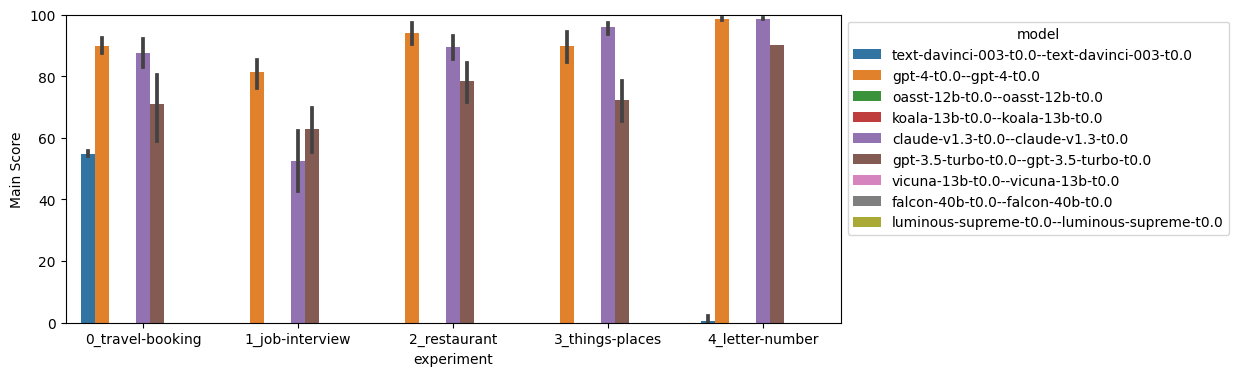

In [9]:
# change the figure size according to your needs
fig, ax = plt.subplots(figsize=(10, 4))

# choose what goes in each axis and legend according to your needs
# you can also e.g. swap y and hue, to get games in the legend and models in the axis
g = sns.barplot(metric_df,
                x='experiment',
                y='value',
                hue='model', 
                ax=ax)

# customize plot details according to your needs
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 100)
plt.ylabel(METRIC)

plt.show()

## Benchmark plots

Reproducing Figure 10 in the paper. As more models or games are added, sizes must be adjusted accordingly:

In [10]:
# read the clem scores
RESULTS_PATH = Path('../results/results.csv')
clem_df = pd.read_csv(RESULTS_PATH, index_col=0)

Horizontal bar plot with player, aborted, lost:

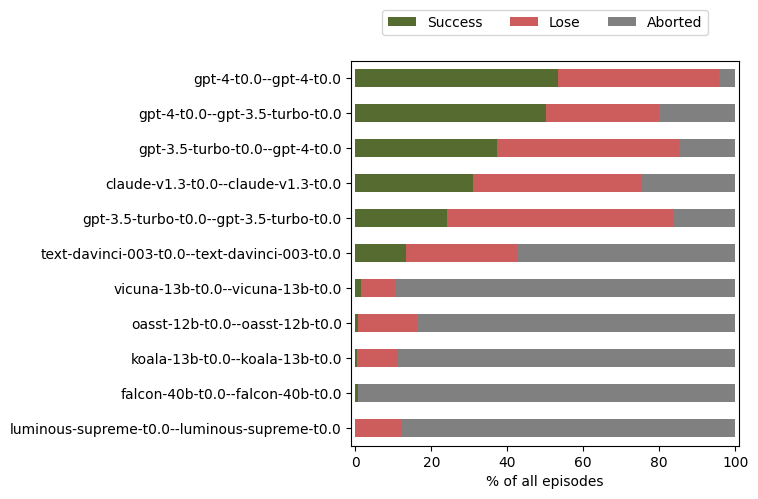

In [11]:
STACK_COLORS = ['darkolivegreen', 'indianred', 'gray']

df_aux = raw_df[raw_df.metric.isin(utils.GAMEPLAY_METRICS)]

df_aux = (df_aux.pivot(index=['game', 'model', 'experiment', 'episode'],
                       columns='metric',
                       values='value')
                .reset_index()
                .drop(columns=['game', 'experiment', 'episode'])
                .groupby('model')
                .sum()
                .sort_values(axis=1, by='metric', ascending=False))
percs = 100 * df_aux.div(df_aux.sum(axis=1), axis=0)
order = clem_df.sort_values(by='-, clemscore').index
percs = percs.reindex(order)

percs.plot(kind='barh',
           stacked=True,
           figsize=(5, 5),
           colormap=ListedColormap(STACK_COLORS))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3)
plt.xlabel('% of all episodes')
plt.xlim(-1, 101)
plt.ylabel('')
plt.show()

Bar plot with the sorted clemscores (they were not sorted in the paper):

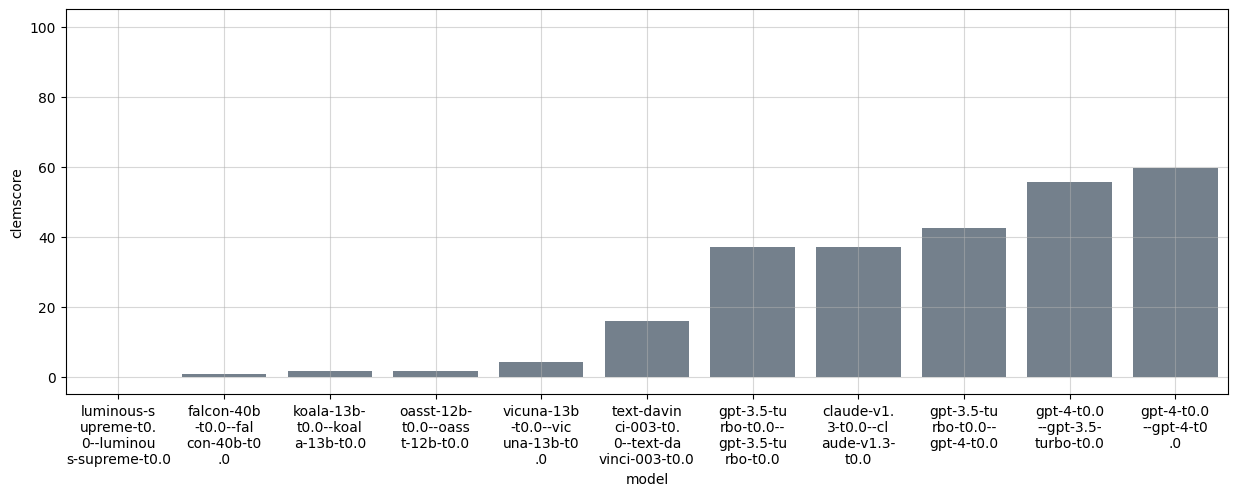

In [12]:
clem_aux = clem_df.sort_values(by='-, clemscore').reset_index(names='model')
# below is a hack to make the current names fit the plot
# ideally a dictionary with short names should be used as in the original implementation for the paper
# warning, if models have matching names up the limit, results will be wrongly merged!
clem_aux['model'] = clem_aux['model'].apply(lambda x: f'{x[:10]}\n{x[10:20]}\n{x[20:30]}\n{x[30:]}')

fig = plt.figure(figsize=(15, 5))
sns.barplot(clem_aux, x='model', y='-, clemscore', color='slategray')
plt.ylim(-5, 105)
plt.ylabel('clemscore')
plt.grid(alpha=0.5)
plt.show()

Polygons. This can get complicated if more games are added. In particular, COLUMN_ORDER must be adjusted. For more models, the number of subplots and figsize must be adjusted.

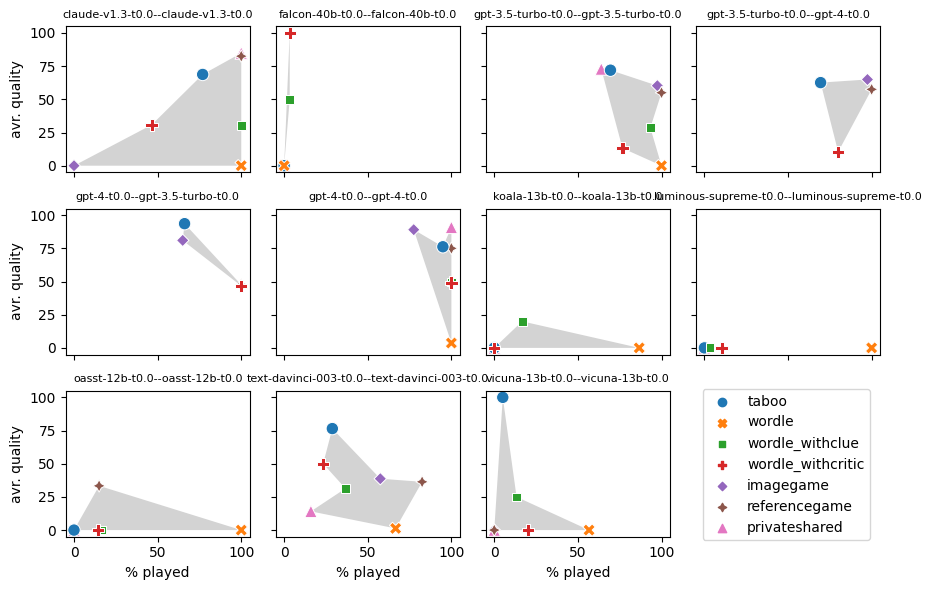

In [13]:
def ccw_sort(p):
    """Put the nodes in clockwise order."""
    # from https://stackoverflow.com/a/44143444 by user ImportanceOfBeingEarnest
    p = np.array(p)
    mean = np.mean(p, axis=0)
    d = p - mean
    s = np.arctan2(d[:, 0], d[:, 1])
    return p[np.argsort(s), :]


fig, ax_list = plt.subplots(3, 4, figsize=(9, 6), sharey=True, sharex=True)
axs = ax_list.flatten()

for n, (model, model_df) in enumerate(raw_df.groupby('model')):
    rows = model_df.metric.isin(utils.MAIN_METRICS)
    df_aux = model_df[rows]
    df_aux = (df_aux.pivot(index=['game', 'experiment', 'episode'],
                            columns='metric',
                            values='value')
                    .reset_index())
    df_aux = df_aux.drop(['episode'], axis=1)

    # create the x and y coordinates for each game
    dots = []
    for game, game_df in df_aux.groupby('game'):
        overall_means = (game_df.mean(numeric_only=True)
                                .fillna(0))
        # replace missing score by 0 when all aborted
        played = overall_means[clemmetrics.METRIC_PLAYED] * 100
        score = overall_means[clemmetrics.BENCH_SCORE]
        dots.append((game, played, score))
    labels, played, scores = zip(*dots)
    # put them in a good order for the polygon
    edges = ccw_sort(list(zip(played, scores)))

    # create the polygon and draw it
    polygon = Polygon(edges, facecolor='lightgray')
    axs[n].add_patch(polygon)

    legend = True if n == 10 else False
    g = sns.scatterplot(x=played,
                        y=scores,
                        hue=labels,
                        style=labels,
                        hue_order=utils.COLUMN_ORDER[1:],
                        style_order=utils.COLUMN_ORDER[1:],
                        s=80,
                        ax=axs[n],
                        legend=legend)
    axs[n].set_xlim(-5, 105)
    axs[n].set_ylim(-5, 105)
    axs[n].set_ylabel('avr. quality')
    axs[n].set_xlabel('% played')
    axs[n].set_title(model, fontsize=8)

fig.legend(loc='lower right', bbox_to_anchor=(0.98, 0.08))
axs[10].legend().set_visible(False)
fig.delaxes(axs[11])
plt.tight_layout()
plt.show()